<a href="https://colab.research.google.com/gist/SoKawai1/9249e76b0ce537019dba9c66dbe3e83d/anime_faces_cropping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вырезка лиц в аниме стилистике с изображений

Источники:

*   Face detector [**Nagadomi's lbpcascade**](https://github.com/nagadomi/lbpcascade_animeface)
*   Источник картинок [**сайт "Danbooru**"](https://danbooru.donmai.us/posts)


---
Дата: **29.11.24**

In [ ]:
!wget https://raw.githubusercontent.com/nagadomi/lbpcascade_animeface/master/lbpcascade_animeface.xml

--2024-11-29 15:50:02--  https://raw.githubusercontent.com/nagadomi/lbpcascade_animeface/master/lbpcascade_animeface.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246945 (241K) [text/plain]
Saving to: ‘lbpcascade_animeface.xml.1’

lbpcascade_animefac 100%[===================>] 241.16K  --.-KB/s    in 0.05s   

2024-11-29 15:50:02 (4.60 MB/s) - ‘lbpcascade_animeface.xml.1’ saved [246945/246945]



In [ ]:
import cv2
import os

def detect(filename, cascade_file="lbpcascade_animeface.xml"):
    if not os.path.isfile(cascade_file):
        raise RuntimeError(f"{cascade_file}: not found")

    cascade = cv2.CascadeClassifier(cascade_file)
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)

    faces = cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(24, 24)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    cv2.imwrite("output.png", image)
    print("Detection complete. Saved as output.png")


In [ ]:
from google.colab import files, drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#detect("/content/drive/MyDrive/idols_image.jpg")

Detection complete. Saved as output.png


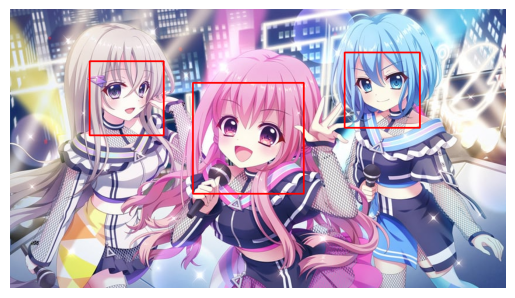

In [ ]:
import matplotlib.pyplot as plt
'''
result_image = cv2.imread("output.png")
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)  # Преобразование в RGB для корректного отображения
plt.imshow(result_image)
plt.axis("off")
plt.show()'''

После обведения мы можем приступить к вырезу лиц из изображений

In [ ]:
def detect_and_crop(filename, cascade_file="lbpcascade_animeface.xml", output_dir="cropped_faces"):
    if not os.path.isfile(cascade_file):
        raise RuntimeError(f"{cascade_file}: not found")
    os.makedirs(output_dir, exist_ok=True)

    cascade = cv2.CascadeClassifier(cascade_file)
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)

    faces = cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(24, 24)
    )

    print(f"Detected {len(faces)} faces.")
    face_counter = 0

    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        face_path = os.path.join(output_dir, f"face_{face_counter}.png")
        cv2.imwrite(face_path, face)
        print(f"Saved: {face_path}")
        face_counter += 1

    print("Cropping complete.")

In [ ]:
#detect_and_crop("/content/drive/MyDrive/idols_image.jpg")

Detected 3 faces.
Saved: cropped_faces/face_0.png
Saved: cropped_faces/face_1.png
Saved: cropped_faces/face_2.png
Cropping complete.


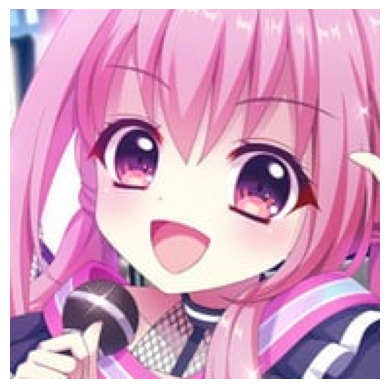

In [ ]:
'''result_image = cv2.imread("/content/cropped_faces/face_2.png")
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plt.imshow(result_image)
plt.axis("off")
plt.show()'''